# 平稳性检验与处理

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 构造时间时间序列
df_obj = pd.DataFrame(np.random.randn(1000, 1), 
                       index=pd.date_range('20180101', periods=1000),
                       columns=['data'])
df_obj['data'] = df_obj['data'].cumsum()
print(df_obj.head())

                data
2018-01-01 -2.180115
2018-01-02 -1.862088
2018-01-03 -2.335505
2018-01-04 -1.493510
2018-01-05 -2.432781


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000173D99E8>,
      dtype=object)

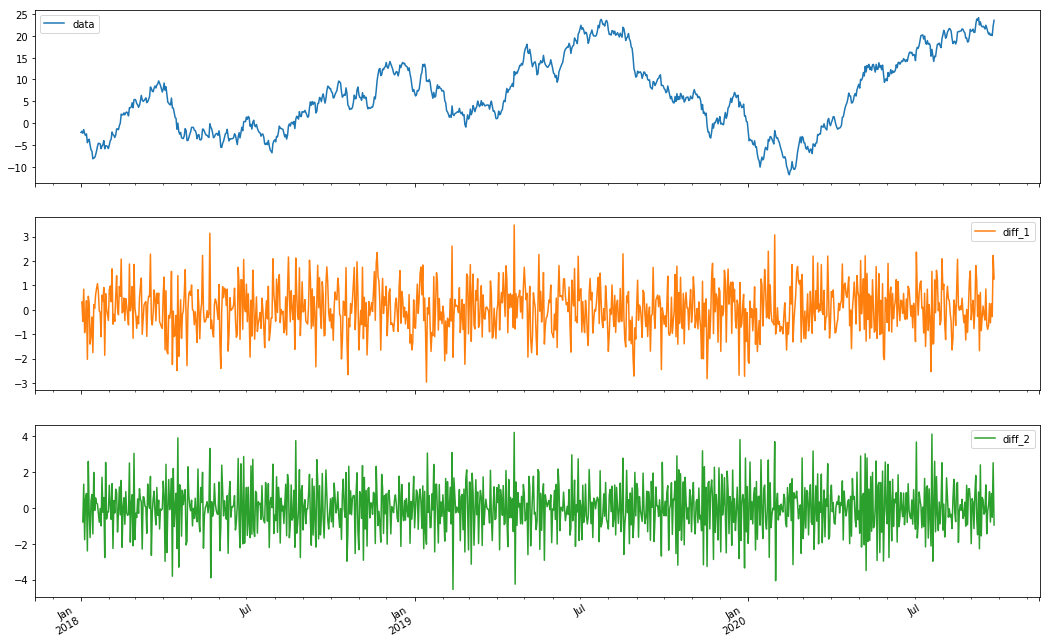

In [3]:
# 一阶差分处理
df_obj['diff_1'] = df_obj['data'].diff(1)

# 二阶差分处理
df_obj['diff_2'] = df_obj['diff_1'].diff(1)

# 查看图像
df_obj.plot(subplots=True, figsize=(18, 12))

## Augmented Dickey-Fuller test

* p值 > 0.05：不平稳
* p值 <= 0.05：平稳

In [15]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts, thresh=0.05):
    """
        检验ts时序是否稳定
    """
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result[1] <= thresh 

In [16]:
check_stationarity(df_obj['data'])

ADF Statistic: -1.572851
p-value: 0.497216
Critical Values:
	5%: -2.864
	10%: -2.568
	1%: -3.437


False

In [17]:
check_stationarity(df_obj['diff_1'].dropna())

ADF Statistic: -16.598073
p-value: 0.000000
Critical Values:
	5%: -2.864
	10%: -2.568
	1%: -3.437


True

In [18]:
check_stationarity(df_obj['diff_2'].dropna())

ADF Statistic: -12.370217
p-value: 0.000000
Critical Values:
	5%: -2.865
	10%: -2.568
	1%: -3.437


True